In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

In [2]:
def process_alpha(alphas):
    out = []
    n_edges = 0
    for i in alphas.split('\n'):
        if i in ['001', '000']:
            out.append(-1)
            out.append(-1)
#             out.append(0)
        elif i in ['100', '101']:
            out.append(-1)
            out.append(1)
#             out.append(1)
            n_edges += 1
        elif i in ['010', '011']:
            out.append(1)
            out.append(-1)
#             out.append(2)
            n_edges += 1
        elif i in ['110', '111']:
            out.append(1)
            out.append(1)
#             out.append(3)
            n_edges += 2
    return out, n_edges

In [3]:
eval_path = './results/supernet-8l_COSINE_sum_600e-20200722-012345/eval_out/'
eval_alphas = []
eval_res = []
all_dirs = sorted([int(i) for i in os.listdir(eval_path)])
for d in all_dirs:
    before_pth = os.path.join(eval_path, str(d), 'before.txt')
    after_pth = os.path.join(eval_path, str(d), 'after.txt')
    alphas_pth = os.path.join(eval_path, str(d), 'alphas.txt')
    with open(before_pth, 'r') as f:
        before_ = f.read()
    with open(after_pth, 'r') as f:
        after_ = f.read()
    with open(alphas_pth, 'r') as f:
        alphas_ = f.read()
    line = [float(i) for i in before_.split('-')] + [float(i) for i in after_.split('-')]
    alphas, n_edges = process_alpha(alphas_)
    line = line + [n_edges]
    eval_res.append(line)
    eval_alphas.append(alphas)
eval_res = np.array(eval_res)
eval_alphas = np.array(eval_alphas)

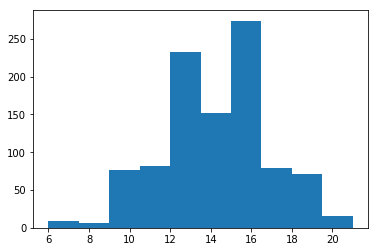

In [4]:
plt.hist(eval_res[:, 8]);

(array([13994.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14006.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

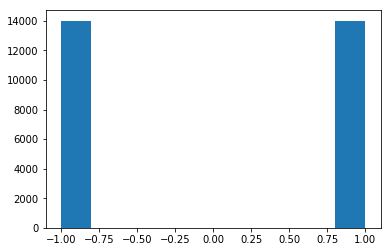

In [5]:
plt.hist(eval_alphas.reshape(-1))

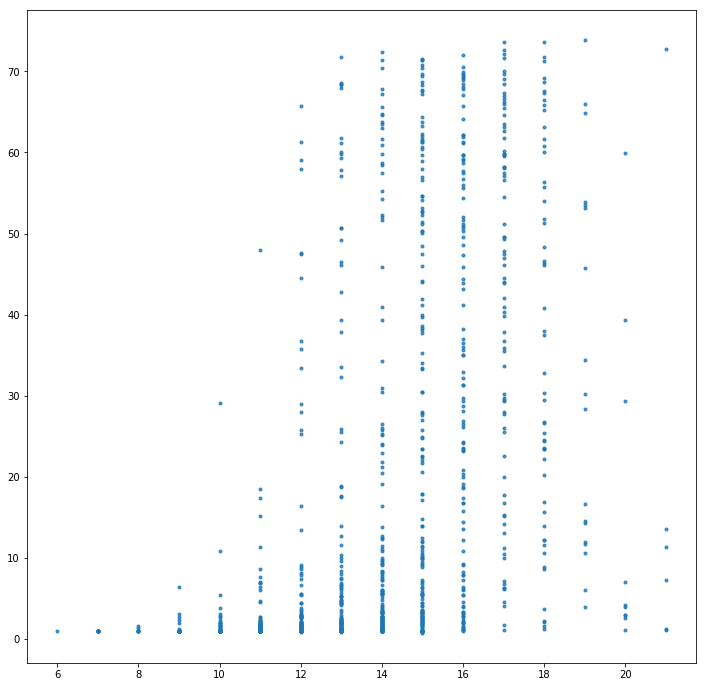

In [87]:
plt.figure(figsize=[6*2, 6*2])
plt.scatter(eval_res[:, 8], eval_res[:, 0], alpha=0.8, marker='.')
# plt.ylim(50, 80)

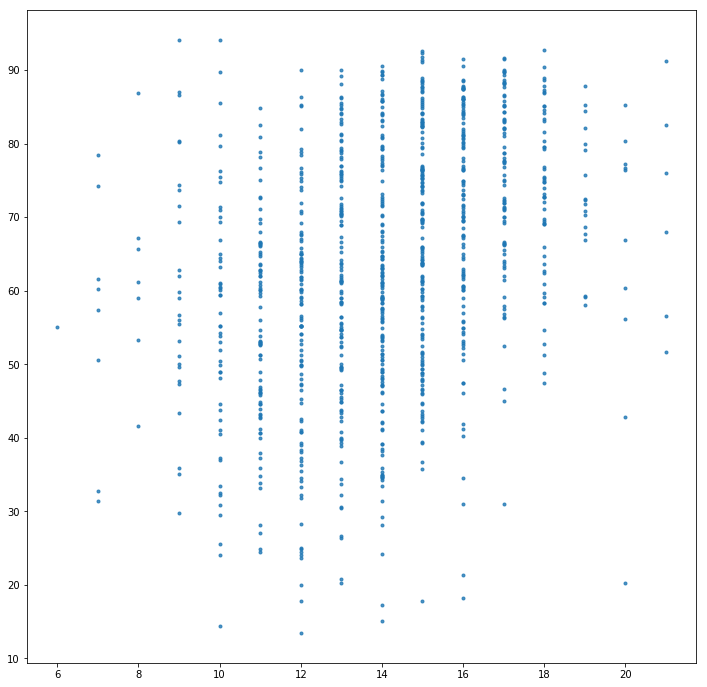

In [85]:
plt.figure(figsize=[6*2, 6*2])
plt.scatter(eval_res[:, 8], eval_res[:, 1], alpha=0.8, marker='.')

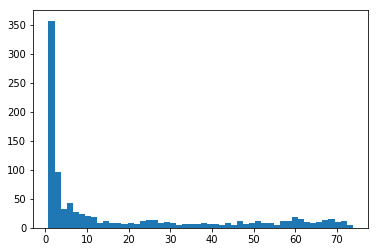

In [12]:
plt.hist(eval_res[:, 0], bins=50);

In [16]:
np.max(eval_res[:, 4]), np.max(eval_res[:, 5])

(75.63, 92.99133196988322)

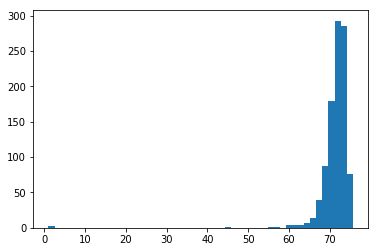

In [14]:
plt.hist(eval_res[:, 4], bins=50);

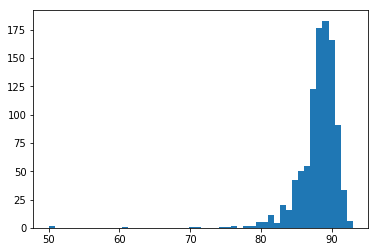

In [15]:
plt.hist(eval_res[:, 5], bins=50);

(50, 95)

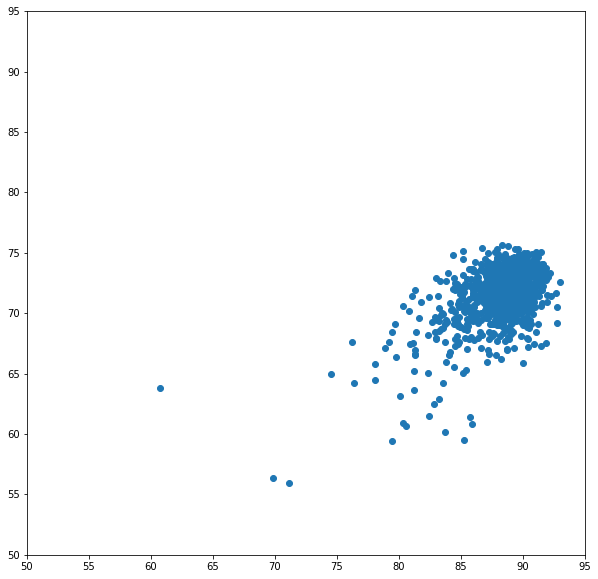

In [19]:
plt.figure(figsize=[10, 10])
plt.scatter((eval_res[:, 5]), (eval_res[:, 4]))
plt.ylim(50, 95)
plt.xlim(50, 95)

In [20]:
np.argsort(eval_res[:, 4])[::-1][:20], np.sort(eval_res[:, 4])[::-1][:20]

(array([744, 535, 565, 930, 898, 943, 906, 423,  67, 561,  38, 280, 233,
         20, 705, 827, 683, 143, 449, 461]),
 array([75.63, 75.53, 75.42, 75.32, 75.32, 75.29, 75.13, 75.08, 75.08,
        75.03, 75.  , 74.96, 74.95, 74.93, 74.92, 74.88, 74.86, 74.84,
        74.8 , 74.78]))

In [21]:
np.argsort(eval_res[:, 5])[::-1][:20], np.sort(eval_res[:, 5])[::-1][:20]

(array([881, 541, 713,  55, 383, 316, 211, 787, 151, 975, 915, 549, 869,
        803, 545, 573, 599, 548, 468, 929]),
 array([92.99133197, 92.78565945, 92.74554388, 92.62799586, 92.27486836,
        92.16716339, 91.99525857, 91.91977112, 91.91948054, 91.89728743,
        91.87793943, 91.84342837, 91.84156896, 91.81275694, 91.76260952,
        91.6364112 , 91.58132277, 91.57622703, 91.55979868, 91.55665702]))

In [22]:
np.argsort(eval_res[:, 5])[::][:20], np.sort(eval_res[:, 5])[::][:20]

(array([793, 614, 829, 895, 304, 574, 878, 694, 821,  77,  14, 106, 248,
        617, 377, 254, 531, 197, 656, 722]),
 array([50.        , 50.        , 60.76066112, 69.82163162, 71.09671504,
        74.51787482, 74.97471371, 76.18406885, 76.3793316 , 78.03589054,
        78.05077473, 78.8993362 , 79.17067488, 79.40441069, 79.41067574,
        79.65221233, 79.74798469, 80.05367141, 80.28831222, 80.34820741]))

(94.08068201495594, 728)

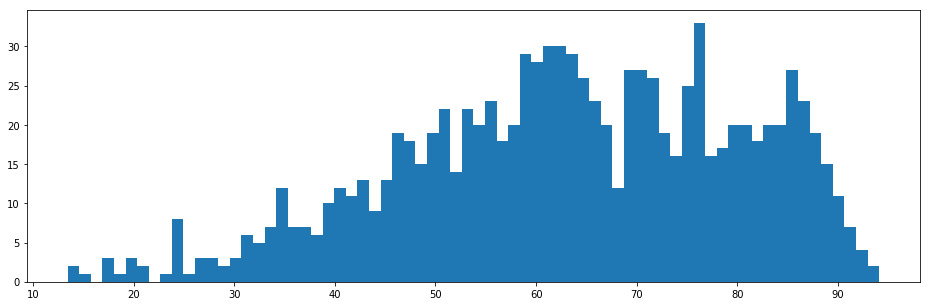

In [74]:
plt.figure(figsize=[16, 5])
plt.hist(eval_res[:, 1], bins=70);
np.max(eval_res[:, 1]), np.argmax(eval_res[:, 1])

(65, 100)

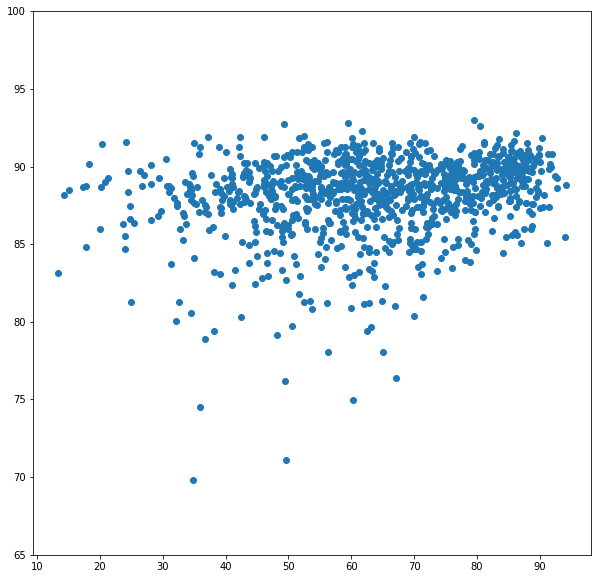

In [72]:
plt.figure(figsize=[10, 10])
plt.scatter(eval_res[:, 1], eval_res[:, 5])
plt.ylim(65, 100)

In [84]:
np.argmax(eval_res[:, 1] + eval_res[:, 0]), np.max(eval_res[:, 1] + eval_res[:, 0])

(954, 164.16697666482278)

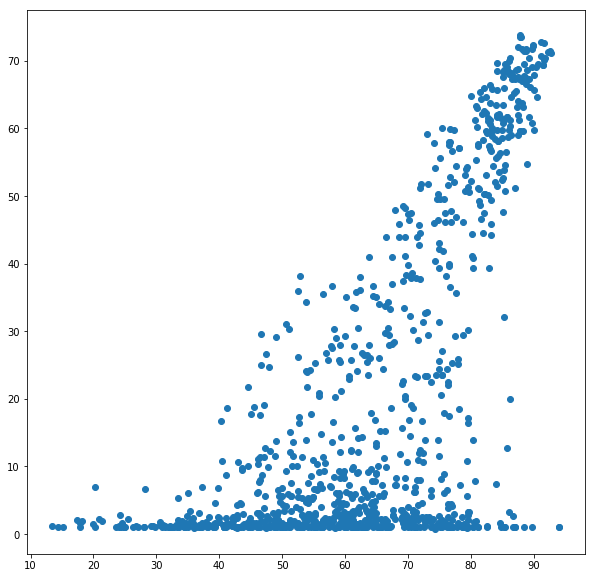

In [81]:
plt.figure(figsize=[10, 10])
plt.scatter(eval_res[:, 1], eval_res[:, 0])
# plt.ylim(65, 100)

(73.84, 449)

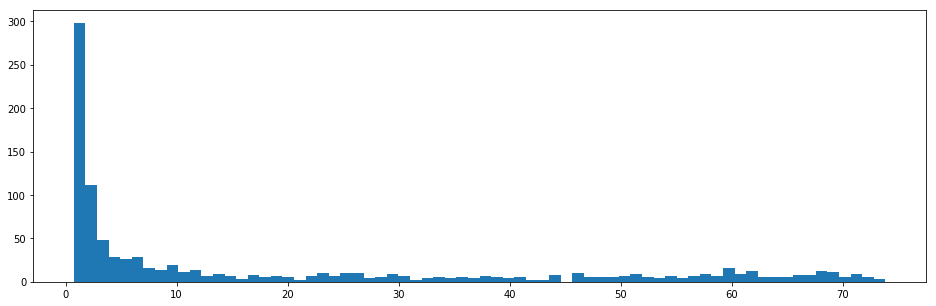

In [77]:
plt.figure(figsize=[16, 5])
plt.hist(eval_res[:, 0], bins=70);
np.max(eval_res[:, 0]), np.argmax(eval_res[:, 0])

(75.63, 744)

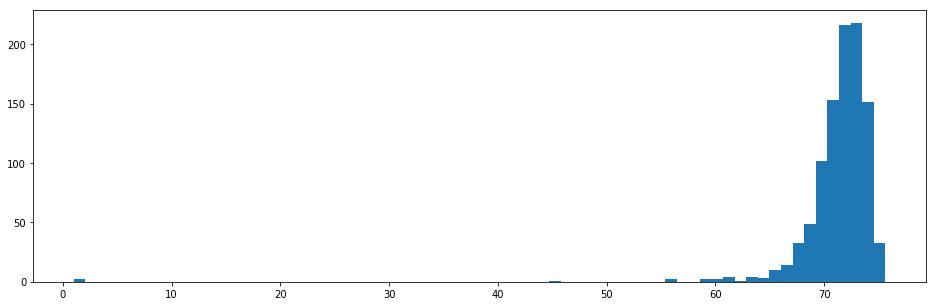

In [79]:
plt.figure(figsize=[16, 5])
plt.hist(eval_res[:, 4], bins=70);
np.max(eval_res[:, 4]), np.argmax(eval_res[:, 4])

(50, 80)

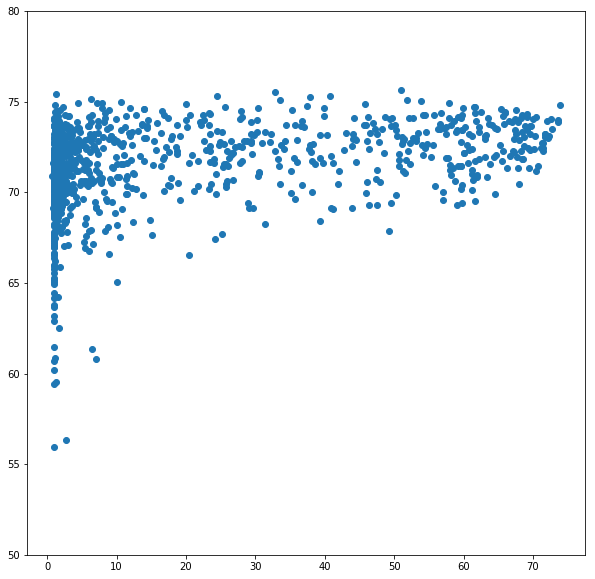

In [76]:
plt.figure(figsize=[10, 10])
plt.scatter(eval_res[:, 0], eval_res[:, 4])
plt.ylim(50, 80)

In [26]:
np.argsort(eval_res[:, 1])[::-1][:20], np.sort(eval_res[:, 1])[::-1][:20]

(array([728, 171, 860, 655, 949, 174, 602, 954, 356, 957, 777, 462, 615,
        839, 803, 985, 108, 880,  41, 379]),
 array([94.08068201, 94.04087753, 92.73475791, 92.63659255, 92.33736786,
        91.8272486 , 91.70546254, 91.55697666, 91.47454896, 91.44074646,
        91.21532495, 91.13269541, 90.62922159, 90.5096801 , 90.36137675,
        90.08679831, 90.05025854, 90.00913597, 89.91789987, 89.88966965]))

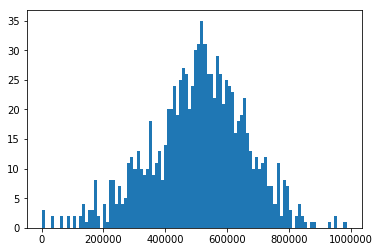

In [40]:
plt.hist(1.16**eval_res[:, 5], bins=100);

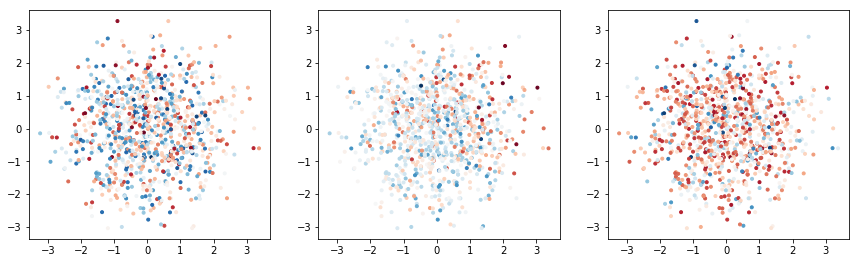

In [36]:
from sklearn.decomposition import PCA

pca = PCA()
eval_alphas_pca = pca.fit_transform(eval_alphas)

fig, axs = plt.subplots(1, 3, figsize=[21*0.7, 6*0.7])
mea = 1.013**eval_res[:, 1]
axs[0].scatter(eval_alphas_pca[:, 0], eval_alphas_pca[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)
# mea = np.clip(eval_res[:, 5], 76, 100)
mea = 1.16**eval_res[:, 5]
axs[1].scatter(eval_alphas_pca[:, 0], eval_alphas_pca[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)
mea = eval_res[:, 5] - eval_res[:, 1]
axs[2].scatter(eval_alphas_pca[:, 0], eval_alphas_pca[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)

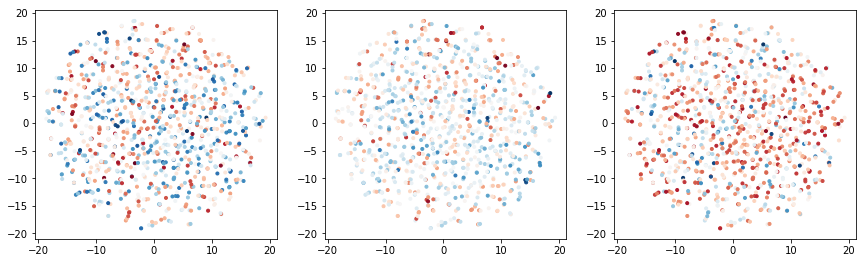

In [41]:
import MulticoreTSNE

tsne = MulticoreTSNE.MulticoreTSNE(n_components=2, n_jobs=12)
eval_alphas_tsne = tsne.fit_transform(eval_alphas)

fig, axs = plt.subplots(1, 3, figsize=[21*0.7, 6*0.7])
mea = 1.013**eval_res[:, 1]
axs[0].scatter(eval_alphas_tsne[:, 0], eval_alphas_tsne[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)
# mea = np.clip(eval_res[:, 5], 76, 100)
mea = 1.16**eval_res[:, 5]
axs[1].scatter(eval_alphas_tsne[:, 0], eval_alphas_tsne[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)
mea = eval_res[:, 5] - eval_res[:, 1]
axs[2].scatter(eval_alphas_tsne[:, 0], eval_alphas_tsne[:, 1], c=mea, cmap='RdBu', marker='.', alpha=0.99)

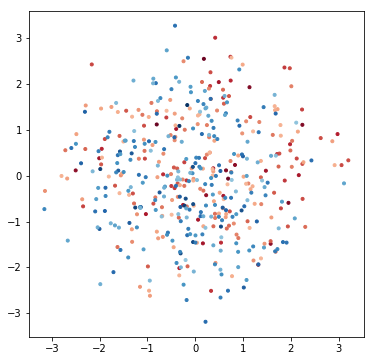

In [44]:
from sklearn.decomposition import PCA

mea = 1.013**eval_res[:, 1]
# mea2 = 1.36**eval_res[:, 4]
idx = np.concatenate([np.argsort(mea)[:230], np.argsort(mea)[::-1][:230]])
pca = PCA()
eval_alphas_pca = pca.fit_transform(eval_alphas[idx])

fig, axs = plt.subplots(1, 1, figsize=[6, 6])
axs.scatter(eval_alphas_pca[:, 0], eval_alphas_pca[:, 1], c=mea[idx], cmap='RdBu', marker='.', alpha=0.99)

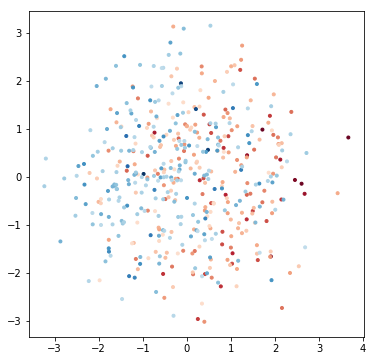

In [42]:
from sklearn.decomposition import PCA

mea = 1.16**eval_res[:, 5]
# mea2 = 1.36**eval_res[:, 4]
idx = np.concatenate([np.argsort(mea)[:230], np.argsort(mea)[::-1][:230]])
pca = PCA()
eval_alphas_pca = pca.fit_transform(eval_alphas[idx])

fig, axs = plt.subplots(1, 1, figsize=[6, 6])
axs.scatter(eval_alphas_pca[:, 0], eval_alphas_pca[:, 1], c=mea[idx], cmap='RdBu', marker='.', alpha=0.99)

In [45]:
pca.components_[0]

array([ 0.31870524, -0.13767142,  0.24771668,  0.16846792,  0.03504446,
       -0.14329482,  0.28044326,  0.38569575, -0.01554134, -0.12022488,
       -0.03800742, -0.14872377,  0.05646768,  0.01494011, -0.22571665,
        0.14399948,  0.0968951 , -0.34715296, -0.22781406,  0.00637452,
        0.15497452,  0.015526  ,  0.00108739, -0.35235153,  0.01497533,
       -0.24352311,  0.05885268, -0.18427372])

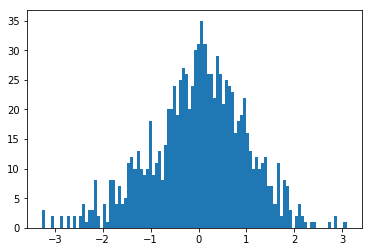

In [46]:
y_tr = 1.16**eval_res[:, 5]
y_tr = (y_tr - np.mean(y_tr)) / np.std(y_tr)
plt.hist(y_tr, bins=100);
y_tr1 = y_tr[:]

In [48]:
idx = np.triu_indices(28, k=1)
cov_alphas = np.matmul(eval_alphas.reshape([1000, 28, 1]), eval_alphas.reshape([1000, 1, 28]))[:, idx[0], idx[1]]

In [49]:
from sklearn.linear_model import LinearRegression
tr_amt = 600
lin = LinearRegression(fit_intercept=False)
x_ = np.concatenate([eval_alphas, cov_alphas], 1)
lin.fit(x_[:tr_amt], y_tr1[:tr_amt])
y = lin.predict(x_[tr_amt:])
print(np.mean((y-y_tr1[tr_amt:])**2), np.mean(np.abs(y-y_tr1[tr_amt:])))
lin.coef_.shape
print(np.log(y[:10] * np.std(1.16**eval_res[:, 5]) + np.mean(1.16**eval_res[:, 5])) / np.log(1.16))
print(np.log(y_tr1[:10] * np.std(1.16**eval_res[:, 5]) + np.mean(1.16**eval_res[:, 5])) / np.log(1.16))

1.6400841065347072 1.0138946272853295
[91.48181504 88.56521406 89.56703156 88.14133951 90.66659563 91.93212514
 89.33258003 91.34266443 88.1369141  88.02890547]
[81.30791865 87.26472675 90.08052024 85.44973219 85.22393548 89.36161344
 83.71231461 89.16678316 86.70688489 87.96635376]


In [50]:
from sklearn.linear_model import LinearRegression
tr_amt = 600
lin = LinearRegression(fit_intercept=False)
lin.fit(eval_alphas[:tr_amt], y_tr[:tr_amt])
y = lin.predict(eval_alphas[tr_amt:])
print(np.mean((y-y_tr1[tr_amt:])**2), np.mean(np.abs(y-y_tr1[tr_amt:])))
lin.coef_
print(np.log(y[:10] * np.std(1.16**eval_res[:, 5]) + np.mean(1.16**eval_res[:, 5])) / np.log(1.16))
print(np.log(y_tr1[:10] * np.std(1.16**eval_res[:, 5]) + np.mean(1.16**eval_res[:, 5])) / np.log(1.16))

0.7979776277234297 0.7011263466137728
[87.16077219 89.77574331 89.7164879  89.47030068 90.93712094 87.53194666
 88.94764159 89.27060198 88.47882651 89.3650622 ]
[81.30791865 87.26472675 90.08052024 85.44973219 85.22393548 89.36161344
 83.71231461 89.16678316 86.70688489 87.96635376]


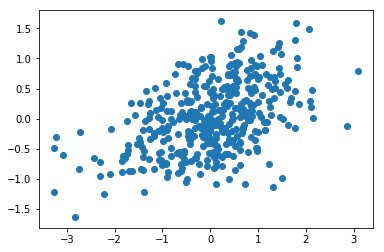

In [51]:
plt.scatter(y_tr[tr_amt:], y)

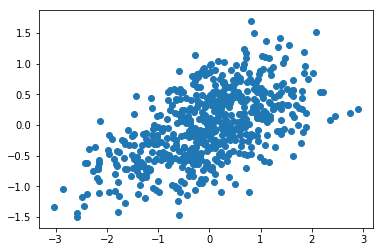

In [52]:
y = lin.predict(eval_alphas[:tr_amt])
plt.scatter(y_tr[:tr_amt], y)

Text(0.5, 0, 'ID Accuracy')

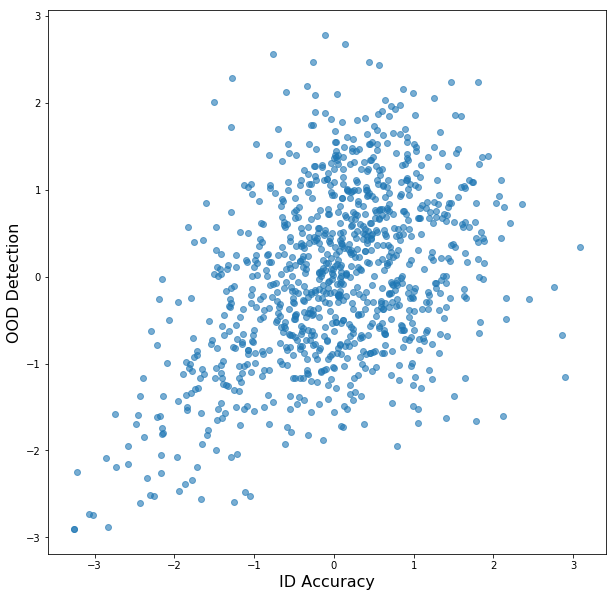

In [61]:
plt.figure(figsize=[10, 10])
plt.scatter(y_tr1, y_tr2, alpha=0.6, marker='o')
plt.ylabel('OOD Detection', fontsize=16)
plt.xlabel('ID Accuracy', fontsize=16)

<BarContainer object of 14 artists>

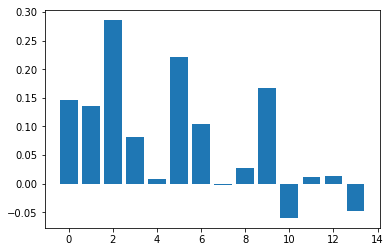

In [54]:
plt.bar(range(14), lin.coef_[::2])

<BarContainer object of 14 artists>

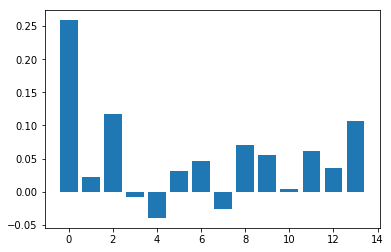

In [55]:
plt.bar(range(14), lin.coef_[1::2])

In [138]:
for i in range(0, 28, 2):
    print(eval_alphas[np.argmax(eval_res[:, 5])][i: i+2])

[ 1 -1]
[ 1 -1]
[1 1]
[-1  1]
[ 1 -1]
[-1  1]
[ 1 -1]
[ 1 -1]
[-1 -1]
[ 1 -1]
[ 1 -1]
[-1  1]
[-1 -1]
[ 1 -1]


In [54]:
np.dot(eval_alphas[idx], lin.coef_)[:10] + lin.intercept_

array([-2.99232185, -2.44583514, -1.91673652, -2.07528505, -1.46559131,
       -1.80659012, -2.55317611, -1.83241838, -2.3139167 , -1.56947866])

In [51]:
y[:10], y_tr[idx][:10]

(array([-2.99232185, -2.44583514, -1.91673652, -2.07528505, -1.46559131,
        -1.80659012, -2.55317611, -1.83241838, -2.3139167 , -1.56947866]),
 array([-2.70114389, -2.58116181, -2.53018379, -2.48959746, -2.44763767,
        -2.40792703, -2.39183156, -2.36243629, -2.35460392, -2.34152263]))

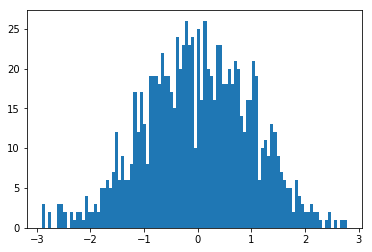

In [60]:
y_tr = 1.20**eval_res[:, 4]
y_tr = (y_tr - np.mean(y_tr)) / np.std(y_tr)
plt.hist(y_tr, bins=100);
y_tr2 = y_tr[:]

In [105]:
np.argsort((y_tr1 + y_tr2) / 2)[::-1][:10]

array([683,  73, 167, 140,  10, 337, 728, 244, 686, 603])

In [99]:
idx = np.argmax((y_tr1 + y_tr2) / 2)
y_tr1[idx], y_tr2[idx]

(2.796817100368402, 2.304082785188518)

In [102]:
eval_res[:, 5][idx], eval_res[:, 4][idx]

(89.45837303759475, 76.4)

In [103]:
for i in range(0, 28, 2):
    print(eval_alphas[683][i: i+2])

[ 1 -1]
[1 1]
[1 1]
[ 1 -1]
[1 1]
[ 1 -1]
[-1  1]
[1 1]
[ 1 -1]
[ 1 -1]
[1 1]
[-1  1]
[-1  1]
[ 1 -1]


In [62]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(eval_alphas, y_tr)
y = lin.predict(eval_alphas)
lin.coef_

array([ 3.27866207e-01,  5.72446633e-02,  2.16700075e-01,  1.22617650e-01,
        3.13623341e-01,  2.94412890e-02,  2.85307669e-01,  1.01861233e-01,
       -2.99543256e-02,  1.20995425e-02,  2.62457189e-01,  5.10283751e-02,
        2.79781363e-01,  9.10854503e-02,  1.66784549e-02,  3.34703956e-02,
        2.98454388e-02, -2.77365440e-04,  2.99564994e-01,  3.72882536e-02,
        3.70082892e-01,  8.17468959e-02,  1.60508940e-02,  1.53883905e-02,
        4.55009901e-02, -1.53198096e-02,  7.87152872e-02, -4.24569087e-02])

<BarContainer object of 14 artists>

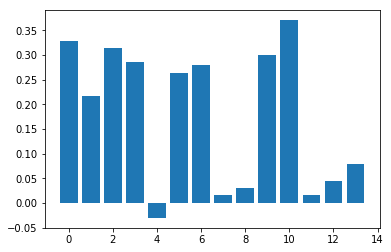

In [63]:
plt.bar(range(14), lin.coef_[::2])

<BarContainer object of 14 artists>

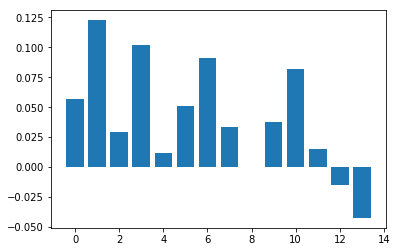

In [64]:
plt.bar(range(14), lin.coef_[1::2])

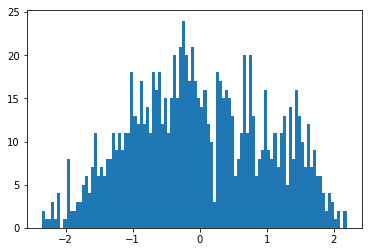

In [67]:
y_tr = 1.013**eval_res[:, 1]
y_tr = (y_tr - np.mean(y_tr)) / np.std(y_tr)
plt.hist(y_tr, bins=100);
y_tr3 = y_tr[:]

In [68]:
# np.argsort((y_tr1 + y_tr2) / 2)[::-1][:10]

In [99]:
idx = np.argmax((y_tr1 + y_tr2) / 2)
y_tr1[idx], y_tr2[idx]

(2.796817100368402, 2.304082785188518)

In [102]:
eval_res[:, 5][idx], eval_res[:, 4][idx]

(89.45837303759475, 76.4)

In [103]:
for i in range(0, 28, 2):
    print(eval_alphas[683][i: i+2])

[ 1 -1]
[1 1]
[1 1]
[ 1 -1]
[1 1]
[ 1 -1]
[-1  1]
[1 1]
[ 1 -1]
[ 1 -1]
[1 1]
[-1  1]
[-1  1]
[ 1 -1]


In [69]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(eval_alphas, y_tr)
y = lin.predict(eval_alphas)
lin.coef_

array([ 0.12410562,  0.1146157 ,  0.0466598 ,  0.14069877,  0.06803418,
        0.08207053,  0.01841251,  0.07596122, -0.00225489,  0.09471088,
        0.16352601,  0.02569658,  0.06531773,  0.11947593, -0.04248839,
        0.07776067, -0.06262021,  0.07540951,  0.18732653,  0.05287967,
        0.08562796,  0.01624342, -0.02019577,  0.07116458, -0.01419557,
        0.12160772, -0.07174941,  0.24216992])

<BarContainer object of 14 artists>

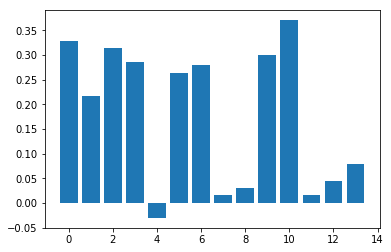

In [63]:
plt.bar(range(14), lin.coef_[::2])

<BarContainer object of 14 artists>

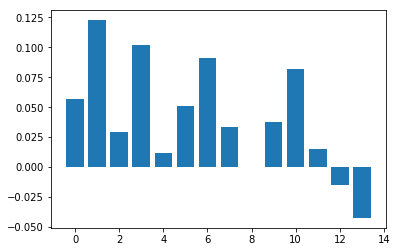

In [64]:
plt.bar(range(14), lin.coef_[1::2])